In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

In [2]:
np.set_printoptions(precision=2) 

In [30]:
def compute_hu_moments(image):

    # binarization 
    ret, thresh = cv2.threshold(image,150,255,  cv2.THRESH_OTSU )
    # contours  
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    moments = cv2.moments(contours[0]) #, True)
    hu_moment = cv2.HuMoments(moments) 
        
    # from https://learnopencv.com/shape-matching-using-hu-moments-c-python/
    '''for i in range(0,7):
        hu_moment[i] = -1* math.copysign(1.0, hu_moment[i]) * math.log10(abs(hu_moment[i]))
    '''
    return hu_moment


In [3]:
file = "./mnist_png/training/%1d.png"%(0)
# loading images 
img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

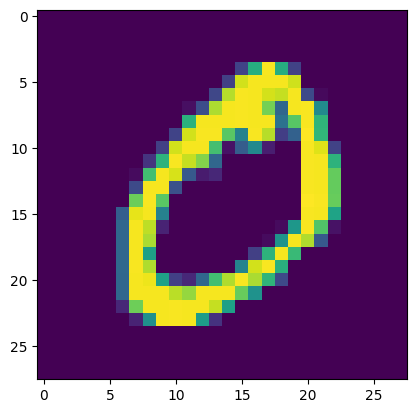

In [4]:
plt.imshow(img)

In [5]:
moments = cv2.moments(img)
print(moments)

{'m00': 31095.0, 'm10': 438364.0, 'm01': 421440.0, 'm20': 6889178.0, 'm11': 5588996.0, 'm02': 6726294.0, 'm30': 117073708.0, 'm21': 84116638.0, 'm12': 84791084.0, 'm03': 119263068.0, 'mu20': 709309.9666827469, 'mu11': -352284.72551857174, 'mu02': 1014389.3979739514, 'mu30': -46071.169057120926, 'mu21': 678230.1053046037, 'mu12': -484085.43466494133, 'mu03': 602901.4418947052, 'nu20': 0.0007335925968926764, 'nu11': -0.0003643448968402587, 'nu02': 0.0010491161659553347, 'nu30': -2.702108787015887e-07, 'nu21': 3.977870682834385e-06, 'nu12': -2.8391975577020135e-06, 'nu03': 3.536062394744964e-06}


In [8]:
hu_moment = cv2.HuMoments(moments) 
print(type(hu_moment))
print(hu_moment.T)

<class 'numpy.ndarray'>
[[1.78e-03 6.31e-07 1.39e-10 6.61e-11 2.36e-21 4.88e-14 5.87e-21]]


In [9]:
moments = cv2.moments(img, True)
print(moments)
hu_moment = cv2.HuMoments(moments) 
print(type(hu_moment))
print(hu_moment.T)

{'m00': 176.0, 'm10': 2452.0, 'm01': 2385.0, 'm20': 38310.0, 'm11': 31317.0, 'm02': 37953.0, 'm30': 649372.0, 'm21': 469415.0, 'm12': 475111.0, 'm03': 669771.0, 'mu20': 4149.181818181816, 'mu11': -1910.3863636363603, 'mu02': 5633.539772727272, 'mu30': 32.752066115732305, 'mu21': 3501.2768595041052, 'mu12': -1867.4832128099224, 'mu03': 2782.9902505165664, 'nu20': 0.13394827667167536, 'nu11': -0.061673113495492, 'nu02': 0.18186789039021412, 'nu30': 7.969976346408718e-05, 'nu21': 0.008520101801782769, 'nu12': -0.004544384156045984, 'nu03': 0.006772203741445451}
<class 'numpy.ndarray'>
[[ 3.16e-01  1.75e-02  5.41e-04  2.54e-04 -8.28e-09  2.71e-05  9.37e-08]]


In [12]:
# binarization 
ret, thresh = cv2.threshold(img,150,255,  cv2.THRESH_OTSU)
# contours  
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
moments = cv2.moments(contours[0]) 
hu_moment = cv2.HuMoments(moments) 
print(hu_moment.T)

[[ 1.82e-01  6.80e-03  1.44e-04  4.64e-06 -8.75e-12 -5.21e-08 -1.20e-10]]


In [31]:
hu = compute_hu_moments(img)
print(hu.T)

[[ 1.82e-01  6.80e-03  1.44e-04  4.64e-06 -8.75e-12 -5.21e-08 -1.20e-10]]


In [32]:
rows, cols = img.shape
print(img.shape)

(28, 28)


In [33]:
M = cv2.getRotationMatrix2D( (rows/2, cols/2),  45, 1.0 )  # center, rotation, scale 
img_rot = cv2.warpAffine( img, M, (rows, cols))

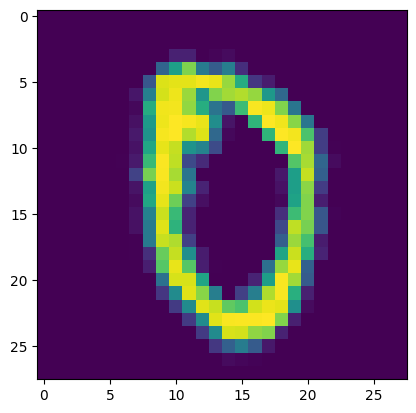

In [34]:
plt.imshow(img_rot)

In [37]:
hu2 = compute_hu_moments(img_rot)
print(hu2.T)

[[ 1.83e-01  7.69e-03  1.01e-04  3.79e-06  1.26e-11  1.74e-08 -7.32e-11]]


In [38]:
print(hu.T)

[[ 1.82e-01  6.80e-03  1.44e-04  4.64e-06 -8.75e-12 -5.21e-08 -1.20e-10]]


In [39]:
M = cv2.getRotationMatrix2D( (rows/2, cols/2),  0, 1.0 )  # center, rotation, scale  
M[0,2] = 3  
M[1,2] = 3  

In [40]:
print(M)

[[ 1.  0.  3.]
 [-0.  1.  3.]]


In [41]:
img_trans = cv2.warpAffine( img, M, (rows, cols))

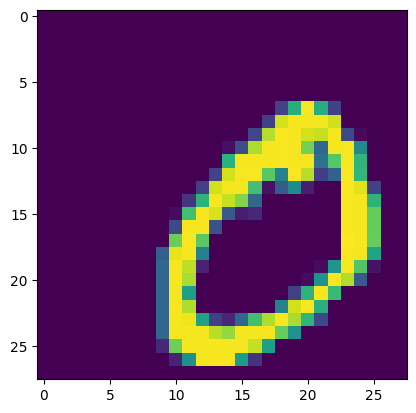

In [42]:
plt.imshow(img_trans)

In [43]:
hu2 = compute_hu_moments(img_trans)
print(hu2.T)


[[ 1.82e-01  6.80e-03  1.44e-04  4.64e-06 -8.75e-12 -5.21e-08 -1.20e-10]]


In [44]:
print(hu.T)

[[ 1.82e-01  6.80e-03  1.44e-04  4.64e-06 -8.75e-12 -5.21e-08 -1.20e-10]]


In [45]:
M = cv2.getRotationMatrix2D( (rows/2, cols/2),  0, 0.5 )  # center, rotation, scale  
img_scale = cv2.warpAffine( img, M, (rows, cols))
hu3 = compute_hu_moments(img_scale)
print(hu3.T)

[[ 1.81e-01  5.79e-03  1.55e-04  2.10e-06 -3.13e-11 -1.07e-07 -2.14e-11]]


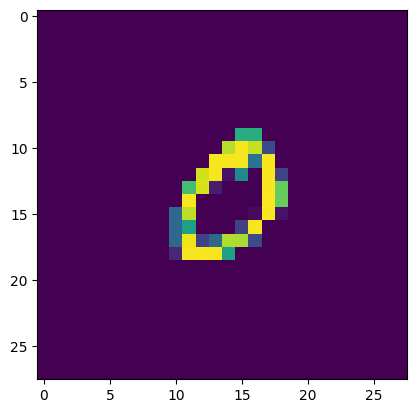

In [46]:
plt.imshow(img_scale)